# Predictive ML Project - Part 1: Chart a Straight Line  
**Author:** Sabri Hamdaoui  
[🔗 GitHub Project Repository](https://github.com/sabrouch36/datafun-07-ml)  


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


In [3]:
celsius = np.arange(0, 100, 10)

fahrenheit = (9/5) * celsius + 32

df = pd.DataFrame({'Celsius': celsius, 'Fahrenheit': fahrenheit})
df


,Celsius,Fahrenheit
0,0,32.0
1,10,50.0
2,20,68.0
3,30,86.0
4,40,104.0
5,50,122.0
6,60,140.0
7,70,158.0
8,80,176.0
9,90,194.0


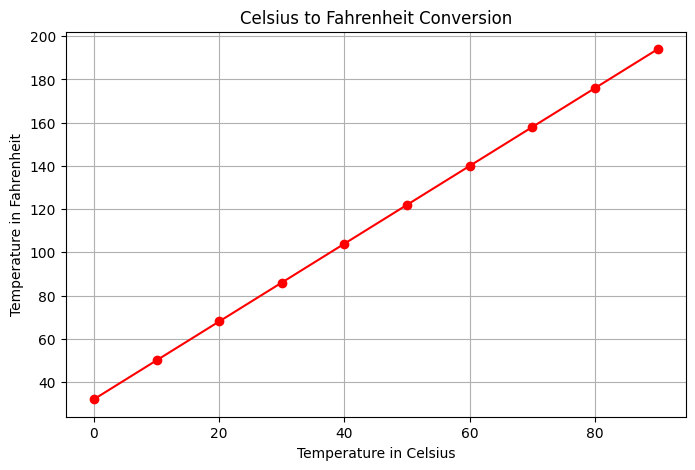

In [4]:
plt.figure(figsize=(8, 5))
plt.plot(df['Celsius'], df['Fahrenheit'], marker='o', linestyle='-', color='red')
plt.title('Celsius to Fahrenheit Conversion')
plt.xlabel('Temperature in Celsius')
plt.ylabel('Temperature in Fahrenheit')
plt.grid(True)
plt.show()


## Part 2 - Prediction (Using linregress)


In [6]:
nyc_df = pd.read_csv('nyc.csv') 
nyc_df.head()


,Date,Temperature
0,1895,34.2
1,1900,32.8
2,1905,33.1
3,1910,30.5
4,1915,31.7


In [11]:
nyc_df.columns = ['Date', 'Temperature']

nyc_df['Date'] = nyc_df['Date'].astype(int)


In [12]:
pd.set_option('display.precision', 2)
nyc_df.describe()


,Date,Temperature
count,25.0,25.00
mean,1955.0,33.78
std,36.8,1.55
min,1895.0,30.50
25%,1925.0,32.90
50%,1955.0,33.80
75%,1985.0,34.70
max,2015.0,36.30


In [13]:
slope, intercept, r_value, p_value, std_err = stats.linregress(
    x=nyc_df['Date'], 
    y=nyc_df['Temperature']
)

print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")


Slope: 0.0130
Intercept: 8.4212


In [14]:
prediction = slope * 2024 + intercept
print(f"Predicted Avg High Temp in Jan 2024: {prediction:.2f}°F")


Predicted Avg High Temp in Jan 2024: 34.67°F


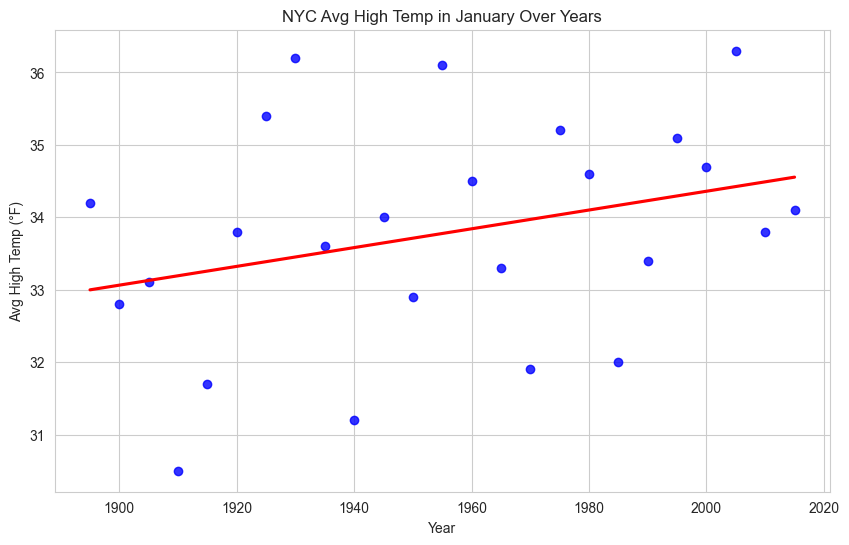

In [15]:
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.regplot(x='Date', y='Temperature', data=nyc_df, ci=None, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('NYC Avg High Temp in January Over Years')
plt.xlabel('Year')
plt.ylabel('Avg High Temp (°F)')
plt.show()


## Part 3 - Prediction (Using scikit-learn)


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [18]:

X = nyc_df['Date'].values.reshape(-1, 1)
y = nyc_df['Temperature'].values


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)


In [20]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
print(f"Slope: {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")


Slope: 0.0101
Intercept: 14.2401


In [23]:
prediction_2024 = model.predict([[2024]])
print(f"Predicted Avg High Temp in Jan 2024: {prediction_2024[0]:.2f}°F")


Predicted Avg High Temp in Jan 2024: 34.76°F


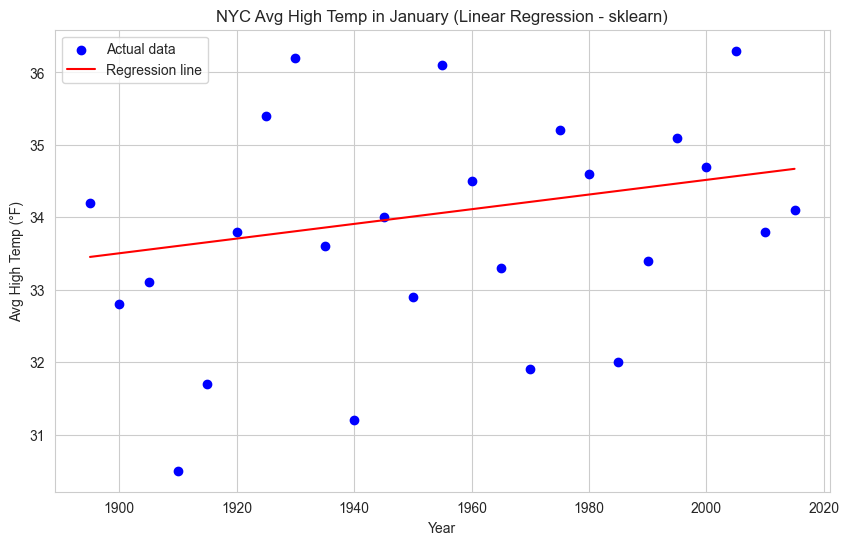

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, model.predict(X), color='red', label='Regression line')
plt.title('NYC Avg High Temp in January (Linear Regression - sklearn)')
plt.xlabel('Year')
plt.ylabel('Avg High Temp (°F)')
plt.legend()
plt.grid(True)
plt.show()
